# Logistic Regression

In this exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant's chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant's scores on two exams and the admissions decision.

Your task is to **build a classification model** that estimates an applicant's probability of admission based the scores from those two exams.

## Logistic Function

Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$h_\theta(x) = g(\theta^Tx)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \frac{1}{1 + e^{-z}}$$

## Cost Function

The cost function as a logistic regression hypothesis is defined as:

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}\ log (h_{\theta}(x^{(i)})) - (1 - y^{(i)})\ log(1 - h_{\theta}(x^{(i)})) ]$$

## Gradient Descent

The gradient of the cost is a vector of the same length as $\theta$ where the $j$th element (for $j=0, 1,..., n$) is defined as follows:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i-1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In order to optimize the iteration between Gradient Descent and Cost Function to find the best value of $\theta$, you may use the SciPy function `opt` from `scipy.optimize` as described below:

In [ ]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost_function, x0=theta, fprime=gradient_descent, args=(X, y))
cost_function(result[0], X, y)

where `cost_function` is your implementation of the cost function, `gradient_descent` is your implementation of the gradient descent function, `theta` is your initial theta value (for this problem, you may initialize $\theta$ as with zeros). Finally, `args` receives your (100, 3) and (100, 1) matrices corresponding to the training set and true labels.

## TIPS

- In order to improve computational cost, add 1 values to the X matrix as:

```
[[1, v1, v2],
 [1, v3, v4],
 [1, v5, v6],
 ...
]
```



## STEPS

- Load the content of the file data.txt
- Plot the values separated by each class to check the distribution of the values
- Implement the Sigmoid function
- Test the Sigmoid function using values from -10 to 10 and check if it reaches the point (0, 0.5).
- Implement the Cost Function
- Test the Cost Function using $\theta=[0., 0., 0]$ :: $J(\theta)$ should give 0.6931
- Implement Gradient Descent 
- Test Gradient Descent : Gradient should return [-0.1, -12.00921659, -11.26284221]
- Apply the SciPy optimization function : this function should return the values of $\theta$ = [-25.16131859, 0.20623159, 0.20147149]
- Test all occurrences of X with this new value of theta and check the number of correct predictions


In [4]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [11]:
X, y = [], []
with open('data/data.txt') as fin:
    for line in fin:
        arr = line.strip().split(',')
        X.append([float(arr[0]), float(arr[1])])
        y.append(int(arr[2]))
X = np.array(X)
y = np.array(y)
y = y.reshape((-1, 1))
print(X.shape)
print(y.shape)

(100, 2)
(100, 1)


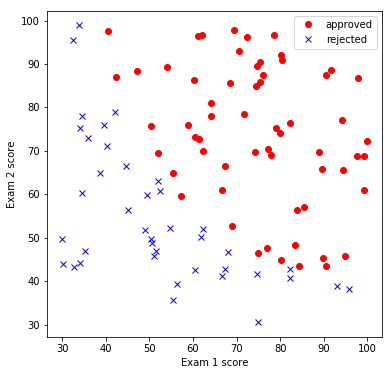

In [5]:
fig = plt.figure(figsize=(6,6))
accept, reject = [], []
for arr, label in zip(X, y):
    if label == 0:
        reject.append(arr)
    else:
        accept.append(arr)
accept = np.array(accept)
reject = np.array(reject)
plt.plot(accept[:,0], accept[:,1], 'ro', label='approved')
plt.plot(reject[:,0], reject[:,1], 'bx', label='rejected')
plt.legend(loc='upper right')
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.show()

## Sigmoid Function

$$g(z) = \frac{1}{1 + e^{-z}}$$

In [7]:
# sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

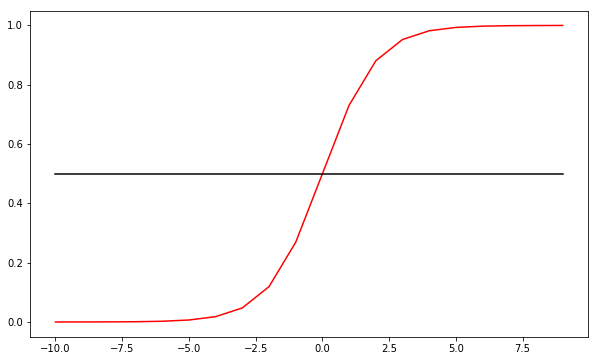

In [8]:
# test sigmoid
range_vals = np.arange(-10, 10, step=1)
center_line = np.array(20*[0.5])
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range_vals, sigmoid(range_vals), 'r')
ax.plot(range_vals, center_line, '#000000')
plt.show()

## Cost Function

$$J(\theta) = \frac{1}{m} \sum_{i=1}^{m} [ -y^{(i)}\ log (h_{\theta}(x^{(i)})) - (1 - y^{(i)})\ log(1 - h_{\theta}(x^{(i)})) ]$$

In [13]:
def cost_function(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    
    first_part = np.multiply(-y, np.log(sigmoid(X*theta.T)))
    second_part = np.multiply((1 - y), np.log(1 - sigmoid(X*theta.T)))
    J = np.sum(first_part - second_part) / len(X)
    return J

In [14]:
# Test Cost Function
m, n = X.shape
X = np.c_[np.ones(m), X] # add a 1 column to X to make computation easier
theta = np.zeros(n+1)
J = cost_function(theta, X, y)
print J

0.69314718056
